In [1]:
import sys
!{sys.executable} -m pip install iplantuml
import iplantuml

# 会社の種類

## 会社の種類
### 会社の種類

+ 会社
     + 持分会社

          + 合同会社 (直接)無限責任社員のみ
          + 合資会社 (直接)有限責任社員のみ & (直接)無限責任社員のみ
          + 合同会社 (間接)有限責任社員のみ

     + 株式会社

          + 株式会社 (間接)有限責任社員のみ
          + 特例有限会社 H18有限会社法廃止


In [2]:
import sys
import notebookutil as nbu
sys.meta_path.append(nbu.NotebookFinder())

from 会社.会社 import 会社
from 会社.会社 import 人的会社
from 会社.持分会社 import 持分会社
from 会社.合名会社 import 合名会社
from 会社.合資会社 import 合資会社
from 会社.合同会社 import 合同会社
from 会社.会社 import 物的会社
from 会社.株式会社 import 株式会社
from 会社.株式会社 import 特例有限会社
from 会社.有限責任事業組合 import 有限責任事業組合
from 資本.資本 import 財産
from 資本.資本 import 信用
from 資本.資本 import 労務
from 資本.資本 import 金銭
from 社員.社員 import 無限責任社員
from 社員.社員 import 有限責任社員
from 社員.責任 import 直接責任
from 社員.責任 import 間接責任
from 権利.権利 import 業務執行権
from 権利.権利 import 会社代表権

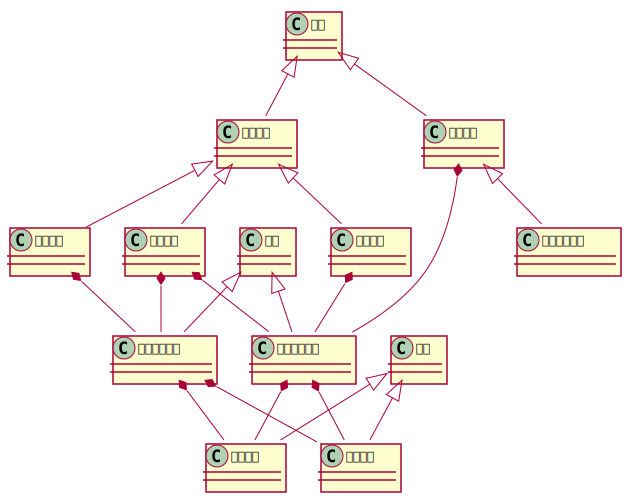

In [15]:
%%plantuml --jar

@startuml
class 会社
会社 <|-- 持分会社
会社 <|-- 株式会社
持分会社 <|-- 合名会社
持分会社 <|-- 合資会社
持分会社 <|-- 合同会社
株式会社 <|-- 特例有限会社
合名会社 *-- 無限責任社員
合資会社 *-- 無限責任社員
合資会社 *-- 有限責任社員
合同会社 *-- 有限責任社員
株式会社 *-- 有限責任社員

class 社員
社員 <|-- 無限責任社員
社員 <|-- 有限責任社員
無限責任社員 *-- 直接責任
無限責任社員 *-- 間接責任
有限責任社員 *-- 直接責任
有限責任社員 *-- 間接責任

class 責任
責任 <|-- 直接責任
責任 <|-- 間接責任
@enduml

### 持分会社の特徴

+ 所有と経営の一致を法律上要求する（業務執行は、社員が行わなければならない）
+ 社員全員で定款を作成し、定款変更には、原則として、社員全員の同意が必要
+ 社員全員の同意がない限り、持分の譲渡も、新社員の加入もできない

### 合名会社

1. 定義
 
    + 直接無限責任社員のみからなる会社
    + 法人である以上、権利・義務の帰属主体となる

1. 特質

    + 社員は業務執行権と会社代表権を持つ
    + 出資の目的は、財産・信用・労務のいずれでもよい
    + 退社制度が認められる
    + 他の社員の承諾がない限り、原則として持分の譲渡はできない
    + 定款によって持分の譲渡を禁止することができる

1. 設立

In [16]:
import unittest


class 合名会社テスト(unittest.TestCase):
    def test_合名会社は持分会社(self):
        self.assertTrue(issubclass(合名会社, 持分会社))

    def test_合名会社は無限責任社員のみで構成される(self):
        社員 = 無限責任社員(直接責任())
        会社 = 合名会社([社員])
        self.assertIn(会社.社員[0], [社員])

        with self.assertRaises(Exception) as cm:
            合名会社([有限責任社員(直接責任())])
        self.assertEqual(cm.exception.args[0], '無限責任社員のみ')

    def test_合名会社は所有と経営が一致している(self):
        社員 = 無限責任社員(直接責任())
        会社 = 合名会社([社員])
        self.assertEqual(str(会社), '所有と経営が一致')

    def test_合名会社は法人格を持つ(self):
        社員 = 無限責任社員(直接責任())
        会社 = 合名会社([社員])
        self.assertTrue(会社.法人格)

    def test_合名会社は権利義務の帰属主体となる(self):
        社員 = 無限責任社員(直接責任())
        会社 = 合名会社([社員])
        self.assertTrue(会社.権利義務の帰属主体())

    def test_合名会社の社員は業務執行権と会社代表権を持つ(self):
        社員 = 無限責任社員(直接責任())
        会社 = 合名会社([社員])
        self.assertIn(業務執行権(), 会社.社員[0].権利)
        self.assertIn(会社代表権(), 会社.社員[0].権利)

    def test_合名会社の出資の目的は財産信用労務のいずれでも良い(self):
        _財産 = 財産()
        _信用 = 信用()
        _労務 = 労務()
        社員 = 無限責任社員(直接責任(),{'財産':_財産, '信用':_信用, '労務':_労務})
        会社 = 合名会社([社員])
        self.assertIn(_財産, 会社.資本)
        self.assertIn(_信用, 会社.資本)
        self.assertIn(_労務, 会社.資本)

    def test_合名会社の社員は退社制度が認められる(self):
        社員1 = 無限責任社員(直接責任())
        社員2 = 無限責任社員(直接責任())
        会社 = 合名会社([社員1, 社員2])
        会社.退社制度(社員1)
        self.assertIn(会社.社員[0], [社員2])

    def test_合名会社の社員は他の社員の承諾がない限り原則として持分の譲渡はできない(self):
        社員1 = 無限責任社員(直接責任())
        社員2 = 無限責任社員(直接責任())
        社員3 = 無限責任社員(直接責任())
        会社 = 合名会社([社員1, 社員2, 社員3])
        with self.assertRaises(Exception) as cm:
            会社.持分の譲渡(社員1)
        self.assertEqual(cm.exception.args[0], '持分の譲渡はできない')


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: Please use assertEqual instead.
............................................
----------------------------------------------------------------------
Ran 44 tests in 0.030s

OK


### 合資会社

1. 定義
 
    + 直接無限責任社員と直接有限責任社員からなる会社
    + 法人である以上、権利・義務の帰属主体となる

1. 特質

    + 各社員は原則として業務執行権を有し、義務を負う
    + 直接有限責任社員の出資は金銭等に限られ、信用・労務による出資はできない    

1. 設立

In [17]:
import unittest

class 合資会社テスト(unittest.TestCase):
    def test_合資会社は持分会社(self):
        self.assertTrue(issubclass(合資会社, 持分会社))

    def test_合資会社は有限責任社員と無限責任社員で構成される(self):
        社員1 = 有限責任社員(直接責任())
        社員2 = 無限責任社員(直接責任())
        会社 = 合資会社([社員1, 社員2])
        self.assertIn(会社.社員[0], [社員1])
        self.assertIn(会社.社員[1], [社員2])

        with self.assertRaises(Exception) as cm:
            合資会社([社員1])
        self.assertEqual(cm.exception.args[0], '構成員2名以上')

        with self.assertRaises(Exception) as cm:
            合資会社([社員1, 社員1])
        self.assertEqual(cm.exception.args[0], '無限責任社員が必要')

        with self.assertRaises(Exception) as cm:
            合資会社([社員2, 社員2])
        self.assertEqual(cm.exception.args[0], '有限責任社員が必要')

    def test_合資会社は所有と経営が一致している(self):
        社員1 = 有限責任社員(直接責任())
        社員2 = 無限責任社員(直接責任())
        会社 = 合資会社([社員1, 社員2])
        self.assertEqual(str(会社), '所有と経営が一致')

    def test_合資会社は法人格を持つ(self):
        社員1 = 有限責任社員(直接責任())
        社員2 = 無限責任社員(直接責任())
        会社 = 合資会社([社員1, 社員2])
        self.assertTrue(会社.法人格)

    def test_合資会社の各社員は原則として業務執行権を持つ(self):
        社員1 = 有限責任社員(直接責任())
        社員2 = 無限責任社員(直接責任())
        会社 = 合資会社([社員1, 社員2])
        self.assertIn(業務執行権(), 会社.社員[0].権利)
        self.assertIn(業務執行権(), 会社.社員[1].権利)

    def test_合資会社の直接有限責任社員の出資は金銭等に限られる(self):
        社員1 = 有限責任社員(直接責任(), {'財産': None, '信用': 信用(), '労務': None})
        社員2 = 無限責任社員(直接責任(), {'財産': 財産(), '信用': None, '労務': None})

        with self.assertRaises(Exception) as cm:
            会社 = 合資会社([社員1, 社員2])
        self.assertEqual(cm.exception.args[0], '直接有限責任社員の出資は金銭等に限られる')

    def test_合資会社の直接無限責任社員の出資は金銭等信用労務(self):
        社員1 = 有限責任社員(直接責任(), {'財産': 財産(), '信用': None, '労務': None})
        社員2 = 無限責任社員(直接責任(), {'財産': None, '信用': 信用(), '労務': 労務()})
        会社 = 合資会社([社員1, 社員2])
        self.assertIn(信用(), 会社.資本)
        self.assertIn(労務(), 会社.資本)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: Please use assertEqual instead.
............................................
----------------------------------------------------------------------
Ran 44 tests in 0.031s

OK


### 合同会社

1. 定義
 
    + 間接有限責任社員からなる持分会社
    + 法人である以上、権利・義務の帰属主体となる

1. 特質

    + 各社員は原則として業務執行権を有し、義務を負う
    + 出資は金銭等に限られ、信用・労務による出資はできない

1. 設立

     社員になろうとする物が、定款作成後、設立の登記をする時までに、その出資にかかわる金銭の全額を払込み、または、その出資にかかわる金銭以外の財産を全部給付しなければならない点は株式会社と同じ。
　　

In [18]:
import unittest

class 合同会社テスト(unittest.TestCase):
    def setUp(self):
        self._社員 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        self._会社 = 合同会社([self._社員])

    def test_合同会社は持分会社(self):
        self.assertTrue(issubclass(合同会社, 持分会社))

    def test_合同会社は有限責任社員のみで構成される(self):
        self.assertIn(self._会社.社員[0], [self._社員])

        with self.assertRaises(Exception) as cm:
            合同会社([無限責任社員(間接責任())])
        self.assertEqual(cm.exception.args[0], '有限責任社員のみ')

    def test_合同会社は所有と経営が一致している(self):
        self.assertEqual(str(self._会社), '所有と経営が一致')

    def test_合同会社は法人格を持つ(self):
        self.assertTrue(self._会社.法人格)

    def test_合同会社の社員は原則として業務執行権を有し義務を負う(self):
        self.assertIn(業務執行権(), self._会社.社員[0].権利)

    def test_合同会社の出資は金銭等に限られ信用労務による出資はできない(self):
        社員 = 有限責任社員(間接責任, {'財産': 金銭(1), '信用': None, '労務': None})
        会社 = 合同会社([社員])
        self.assertIn(金銭(1), 会社.資本)

        社員 = 有限責任社員(間接責任, {'財産': None, '信用': 信用(), '労務': 労務()})
        with self.assertRaises(Exception) as cm:
            会社 = 合同会社([社員])
        self.assertEqual(cm.exception.args[0], '出資は金銭等に限られる')

    def test_合同の資本金は1円以上(self):
        社員 = 有限責任社員(間接責任(), {'財産': 金銭(0), '信用': None, '労務': None})
        with self.assertRaises(Exception) as cm:
            合同会社([社員])
        self.assertEquals(cm.exception.args[0], '資本金1円以上')

    def test_合同会社は株式会社に組織変更できる(self):
        pass

    def test_合同会社は有限責任事業組合に組織変更できない(self):
        pass
                

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: Please use assertEqual instead.
............................................
----------------------------------------------------------------------
Ran 44 tests in 0.029s

OK


### 株式会社

1. 定義
 
    + 社員の地位が、細分化された割当的単位の形式をとる
    + 間接有限責任社員から構成される
    + 会社債権者に対しては直接の責任を負わない
    + 法人である以上、権利・義務の帰属主体となる

1. 特質

    + 所有と経営の分離が認められる
    + 株主は、間接有限責任しか負わない
    + 期間設計の柔軟化が広く認められる
    + 対価の柔軟性が認められるようになった
    + 株主に退社制度が認められないことから、原則として株式の払い戻しは認められないが、株式を譲渡することで投下資本を回収できる


In [19]:
import unittest

class 株式会社テスト(unittest.TestCase):
    def setUp(self):
        self._社員 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        self._会社 = 株式会社([self._社員])

    def test_持分会社は会社(self):
        self.assertTrue(issubclass(持分会社, 会社))

    def test_株式会社は会社(self):
        self.assertTrue(issubclass(株式会社, 会社))

    def test_株式会社は物的会社(self):
        self.assertTrue(issubclass(株式会社, 物的会社))

    def test_株式会社は有限責任社員のみで構成される(self):
        self.assertIn(self._会社.社員[0], [self._社員])

        with self.assertRaises(Exception) as cm:
            株式会社([無限責任社員(直接責任())])
        self.assertEqual(cm.exception.args[0], '有限責任社員のみ')

    def test_株式会社は所有と経営が分離(self):
        self.assertEqual(str(self._会社), '所有と経営が分離')

    def test_特例有限会社は株式会社(self):
        self.assertTrue(issubclass(特例有限会社, 株式会社))

    def test_H18有限責任会社廃止(self):
        with self.assertRaises(Exception) as cm:
            特例有限会社([有限責任社員(間接責任())])
        self.assertEqual(cm.exception.args[0], 'H18有限会社法廃止')

    def test_株式会社の社員は退社制度が認められない(self):
        社員1 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        社員2 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        会社 = 株式会社([社員1, 社員2])
        with self.assertRaises(Exception) as cm:
            会社.退社制度(社員2)
        self.assertEquals(cm.exception.args[0], '退社制度は認められない')
        self.assertEqual(len(会社.社員), 2)

    def test_株式会社の社員は株式を譲渡して投下資本を回収できる(self):
        社員1 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        社員2 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        会社 = 株式会社([社員1, 社員2])
        self.assertEquals(len(会社.社員), 2)

    def test_株式会社の資本金は1円以上(self):
        社員 = 有限責任社員(間接責任(), {'財産': 金銭(0), '信用': None, '労務': None})
        with self.assertRaises(Exception) as cm:
            株式会社([社員])
        self.assertEquals(cm.exception.args[0], '資本金1円以上')

    def test_株式会社は合同会社に組織変更できる(self):
        社員 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        組織 = 合同会社([社員])
        self.assertEquals(self._会社.組織変更(組織), 組織)

    def test_株式会社は有限責任事業組合に組織変更できない(self):
        社員1 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        社員2 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        組織 = 有限責任事業組合([社員1, 社員2])
        with self.assertRaises(Exception) as cm:
            self._会社.組織変更(組織)
        self.assertEquals(cm.exception.args[0], '変更不可')
        

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)        


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: Please use assertEqual instead.
............................................
----------------------------------------------------------------------
Ran 44 tests in 0.030s

OK


### 有限責任事業組合

1. 定義
 
    + 構成員の全員が有限責任を負い、内部関係については組合的規律が適用される   
    + 組合である以上、法人格は認められず、権利義務の帰属主体とはならない

1. 特質

    + 構成員課税

        法人等の利益に対して課税されず、構成員の所得に対して課税する課税制度のことでパススルー課税とも呼ばれる

In [20]:
import unittest

class 有限責任事業組合テスト(unittest.TestCase):
    def setUp(self):
        self._社員1 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        self._社員2 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        self._会社 = 有限責任事業組合([self._社員1, self._社員2])

    def test_有限責任事業組合は持分会社(self):
        self.assertTrue(issubclass(有限責任事業組合, 持分会社))

    def test_有限責任事業組合は所有と経営が一致している(self):
        self.assertEqual(str(self._会社), '所有と経営が一致')

    def test_有限責任事業組合は有限責任社員2名以上で構成される(self):
        self.assertEqual(len(self._会社.社員), 2)

        with self.assertRaises(Exception) as cm:
            有限責任事業組合([有限責任社員(間接責任())])
        self.assertEqual(cm.exception.args[0], '構成員2名以上')

        with self.assertRaises(Exception) as cm:
            有限責任事業組合([有限責任社員(間接責任()), 無限責任社員(直接責任())])
        self.assertEqual(cm.exception.args[0], '有限責任社員のみ')

        with self.assertRaises(Exception) as cm:
            有限責任事業組合([有限責任社員(間接責任()), 無限責任社員(間接責任())])
        self.assertEqual(cm.exception.args[0], '有限責任社員のみ')

    def test_有限責任事業組合は法人格を持たない(self):
        self.assertFalse(self._会社.法人格)

    def test_有限責任事業組合の資本金は2円以上(self):
        社員1 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        社員2 = 有限責任社員(間接責任(), {'財産': 金銭(0), '信用': None, '労務': None})
        with self.assertRaises(Exception) as cm:
            有限責任事業組合([社員1, 社員2])
        self.assertEquals(cm.exception.args[0], '資本金2円以上')

    def test_有限責任事業組合は株式会社に組織変更できない(self):
        社員 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        組織 = 株式会社([社員])
        with self.assertRaises(Exception) as cm:
            self._会社.組織変更(組織)
        self.assertEquals(cm.exception.args[0], '変更不可')

    def test_有限責任事業組合は合同会社に組織変更できない(self):
        社員1 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        社員2 = 有限責任社員(間接責任(), {'財産': 金銭(1), '信用': None, '労務': None})
        組織 = 合同会社([社員1, 社員2])
        with self.assertRaises(Exception) as cm:
            self._会社.組織変更(組織)
        self.assertEquals(cm.exception.args[0], '変更不可')

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: Please use assertEqual instead.
............................................
----------------------------------------------------------------------
Ran 44 tests in 0.025s

OK
